### Universidad del Valle de Guatemala<br>Data Science<br>Laboratorio#5

#### Integrantes:
  - Christopher García 20541
  -

In [24]:
# Importa las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.optimizers import Adam
from pandas import get_dummies
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('UK_foods.csv')

In [3]:
df.describe()

,England,Wales,Scotland,N.Ireland
count,17.000000,17.000000,17.000000,17.000000
mean,469.647059,503.941176,460.235294,429.941176
std,452.701466,463.859282,469.595907,479.896014
min,54.000000,64.000000,53.000000,41.000000
25%,156.000000,175.000000,147.000000,135.000000
50%,253.000000,265.000000,242.000000,209.000000
75%,685.000000,803.000000,566.000000,586.000000
max,1472.000000,1582.000000,1572.000000,1506.000000


In [4]:
df.head()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [5]:
df.tail()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
12,Cereals,1472,1582,1462,1494
13,Beverages,57,73,53,47
14,Soft_drinks,1374,1256,1572,1506
15,Alcoholic_drinks,375,475,458,135
16,Confectionery,54,64,62,41


In [6]:
# Calcula estadísticas descriptivas básicas para las columnas numéricas
numeric_stats = df.describe()

# Calcula la correlación entre las columnas numéricas
correlation_matrix = df.corr()

# Imprime las estadísticas descriptivas básicas
print("Estadísticas Descriptivas Básicas:")
print(numeric_stats)

# Imprime la matriz de correlación
print("\nMatriz de Correlación:")
print(correlation_matrix)
print()

# Calcula la mediana para las columnas numéricas
median = df.median()

# Calcula los percentiles 25 y 75 para las columnas numéricas
percentile_25 = df.quantile(0.25)
percentile_75 = df.quantile(0.75)

# Imprime la mediana
print("Mediana:")
print(median)

# Imprime los percentiles 25 y 75
print("\nPercentil 25:")
print(percentile_25)
print("\nPercentil 75:")
print(percentile_75)


Estadísticas Descriptivas Básicas:
           England        Wales     Scotland    N.Ireland
count    17.000000    17.000000    17.000000    17.000000
mean    469.647059   503.941176   460.235294   429.941176
std     452.701466   463.859282   469.595907   479.896014
min      54.000000    64.000000    53.000000    41.000000
25%     156.000000   175.000000   147.000000   135.000000
50%     253.000000   265.000000   242.000000   209.000000
75%     685.000000   803.000000   566.000000   586.000000
max    1472.000000  1582.000000  1572.000000  1506.000000

Matriz de Correlación:
            England     Wales  Scotland  N.Ireland
England    1.000000  0.990654  0.984917   0.947619
Wales      0.990654  1.000000  0.964122   0.937061
Scotland   0.984917  0.964122  1.000000   0.940742
N.Ireland  0.947619  0.937061  0.940742   1.000000

Mediana:
England      253.0
Wales        265.0
Scotland     242.0
N.Ireland    209.0
dtype: float64

Percentil 25:
England      156.0
Wales        175.0
Scotland  

In [7]:
df = df.rename(columns={'Unnamed: 0': 'Product'})

In [8]:
label_encoder = LabelEncoder()
df['Product_Encoded'] = label_encoder.fit_transform(df['Product'])
df = df.drop('Product', axis=1)
df = df.drop('Product_Encoded', axis=1)
df.head()

,England,Wales,Scotland,N.Ireland
0,105,103,103,66
1,245,227,242,267
2,685,803,750,586
3,147,160,122,93
4,193,235,184,209


In [12]:
df.transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


#### Con ejemplo de clase


In [15]:
codificador = Sequential()
codificador.add(Dense(units = 2,
                      activation = 'relu',
                      input_shape = [4]))

decodificador = Sequential()
decodificador.add(Dense(units = 4,
                        activation = 'relu',
                        input_shape = [2]))


In [16]:
from tensorflow.keras.optimizers import SGD

autocodificador = Sequential([codificador,
                              decodificador])
autocodificador.compile(loss = "mse",
                        optimizer = SGD(lr = 1.5))

In [18]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler()
datos_normalizados = normalizador.fit_transform(df)
datos_normalizados

array([[0.03596615, 0.0256917 , 0.03291639, 0.01706485],
       [0.13469676, 0.10737813, 0.12442396, 0.15426621],
       [0.44499295, 0.48682477, 0.45885451, 0.37201365],
       [0.06558533, 0.06324111, 0.04542462, 0.03549488],
       [0.09802539, 0.11264822, 0.08624095, 0.11467577],
       [0.0719323 , 0.07312253, 0.06188282, 0.0668942 ],
       [0.4696756 , 0.53359684, 0.33772219, 0.67713311],
       [0.1403385 , 0.13241107, 0.07768269, 0.06962457],
       [0.30606488, 0.33333333, 0.24028966, 0.21433447],
       [0.10155148, 0.09156785, 0.10994075, 0.0996587 ],
       [0.2157969 , 0.19828722, 0.18696511, 0.2       ],
       [0.73906911, 0.70685112, 0.59512837, 0.43208191],
       [1.        , 1.        , 0.92758394, 0.99180887],
       [0.00211566, 0.00592885, 0.        , 0.00409556],
       [0.93088858, 0.78524374, 1.        , 1.        ],
       [0.22637518, 0.27075099, 0.26662278, 0.06416382],
       [0.        , 0.        , 0.00592495, 0.        ]])

In [19]:
autocodificador.fit(datos_normalizados,
                    datos_normalizados,
                    epochs = 5)
codificado_2dim = codificador.predict(datos_normalizados)
codificado_2dim.shape

Epoch 1/5
1/1 [==============================] - 1s 680ms/step - loss: 0.0815
Epoch 2/5
1/1 [==============================] - 0s 14ms/step - loss: 0.0811
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 0.0808
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 0.0804
Epoch 5/5
1/1 [==============================] - 0s 58ms/step


(17, 2)

In [20]:
codificado_2dim

array([[0.        , 0.04059799],
       [0.00691762, 0.17562346],
       [0.        , 0.6442592 ],
       [0.        , 0.07815312],
       [0.        , 0.1485473 ],
       [0.        , 0.09901255],
       [0.00700844, 0.70205164],
       [0.        , 0.15447503],
       [0.        , 0.40415913],
       [0.        , 0.14172603],
       [0.        , 0.2808456 ],
       [0.        , 0.89860344],
       [0.        , 1.383929  ],
       [0.        , 0.00674128],
       [0.        , 1.2685238 ],
       [0.        , 0.3265376 ],
       [0.        , 0.00402017]], dtype=float32)

In [21]:
plt.scatter(codificado_2dim[:, 0],
            codificado_2dim[:, 1],
            c = y)

NameError: ignored

In [22]:
fig = px.scatter(x = codificado_2dim[:, 0],
                 y = codificado_2dim[:, 1],
                 color = y,
                 width = 700,
                 height = 500)
fig.show()

NameError: ignored

#### Otra implementación

In [13]:
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df)

# Define la arquitectura del autocodificador con más capas
input_layer = Input(shape=(len(df.columns),))
# Capa de entrada
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
# Capa oculta 1
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)
# Capa oculta 2
encoding_layer = Dense(2, activation='relu')(hidden_layer_2)
# Capa de "cuello de botella" para reducir a 2 dimensiones
hidden_layer_3 = Dense(32, activation='relu')(encoding_layer)
# Capa oculta 3
hidden_layer_4 = Dense(64, activation='relu')(hidden_layer_3)
# Capa oculta 4
decoding_layer = Dense(len(df.columns), activation='sigmoid')(hidden_layer_4)
# Capa de salida

# Crea el modelo
autoencoder = Model(input_layer, decoding_layer)

# Compila y entrena el modelo
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(normalized_data, normalized_data, epochs=50, batch_size=32)

# Evalúa el rendimiento del autocodificador
loss = autoencoder.evaluate(normalized_data, normalized_data)
print(f'\nPérdida de reconstrucción: {loss}')

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 1.2482
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 1.2454
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 1.2430
Epoch 4/50
1/1 [==============================] - 0s 14ms/step - loss: 1.2406
Epoch 5/50
1/1 [==============================] - 0s 15ms/step - loss: 1.2379
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 1.2351
Epoch 7/50
1/1 [==============================] - 0s 15ms/step - loss: 1.2320
Epoch 8/50
1/1 [==============================] - 0s 13ms/step - loss: 1.2287
Epoch 9/50
1/1 [==============================] - 0s 12ms/step - loss: 1.2251
Epoch 10/50
1/1 [==============================] - 0s 12ms/step - loss: 1.2212
Epoch 11/50
1/1 [==============================] - 0s 15ms/step - loss: 1.2171
Epoch 12/50
1/1 [==============================] - 0s 13ms/step - loss: 1.2125
Epoch 13/50
1/1 [==============================] - 0s 12ms/step

1/1 [==============================] - 0s 109ms/step


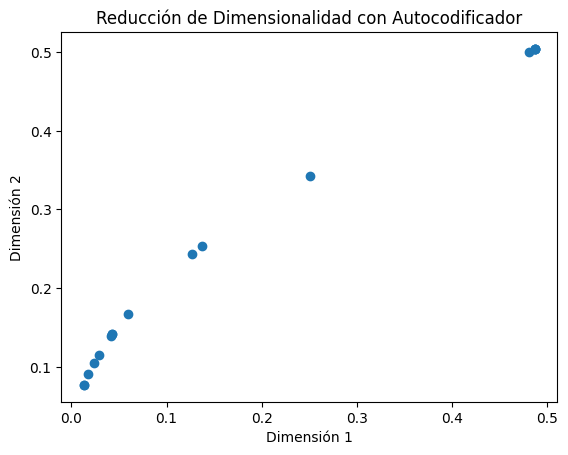

In [14]:
# Parte 3: Reducción de Dimensionalidad y Visualización

# Utiliza el autocodificador para reducir las dimensiones a 2
encoded_data = autoencoder.predict(normalized_data)

# Visualiza las dos dimensiones en un gráfico de dispersión
plt.scatter(encoded_data[:, 0], encoded_data[:, 1])
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.title('Reducción de Dimensionalidad con Autocodificador')
plt.show()

In [25]:
# Crea un modelo secuencial
autoencoder = Sequential()

# Capa de entrada
autoencoder.add(Dense(64, activation='relu', input_shape=(len(df.columns),)))

# Capa de "cuello de botella" para reducir a 2 dimensiones
autoencoder.add(Dense(2, activation='relu'))

# Capa de salida
autoencoder.add(Dense(len(df.columns), activation='sigmoid'))

# Compila el modelo con una tasa de aprendizaje ajustable
custom_optimizer = Adam(learning_rate=0.001)  # Ajusta la tasa de aprendizaje según sea necesario
autoencoder.compile(optimizer=custom_optimizer, loss='mean_squared_error')

# Aumenta el número de épocas de entrenamiento
autoencoder.fit(normalized_data, normalized_data, epochs=100, batch_size=32)  # Aumenta el número de épocas

# Evalúa el rendimiento del autocodificador
loss = autoencoder.evaluate(normalized_data, normalized_data)
print(f'Pérdida de reconstrucción: {loss}')

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.2475
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 1.2470
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 1.2465
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2460
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 1.2456
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2452
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2449
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2445
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 1.2441
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2438
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 1.2434
Epoch 12/100
1/1 [==============================] - 0s 16ms/step - loss: 1.2430
Epoch 13/100
1/1 [==============================] -